In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.datasets import cifar10

In [6]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

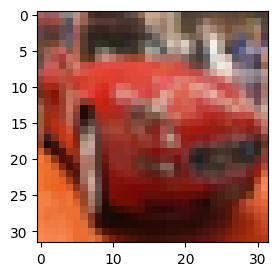

In [10]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[5])

In [12]:
X_train.max()

255

Normalizing the inut features

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train_cat = to_categorical(y_train, num_classes = 10)
print(y_train.shape)

(50000, 1)


In [17]:
y_test_cat = to_categorical(y_test, num_classes = 10)
print(y_test.shape)

(10000, 1)


Creating the cnn model

In [18]:
model = Sequential()

#convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(32,32,3), activation='relu'))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               5

Adding Early Stopping

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss',patience=2,verbose=1)

In [22]:
model.fit(X_train, y_train_cat, epochs=15, validation_data=(X_test,y_test_cat),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 21s 6ms/step - loss: 1.4119 - accuracy: 0.4974 - val_loss: 1.1370 - val_accuracy: 0.5957
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0520 - accuracy: 0.6305 - val_loss: 1.0190 - val_accuracy: 0.6441
Epoch 3/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8969 - accuracy: 0.6844 - val_loss: 0.9329 - val_accuracy: 0.6764
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7824 - accuracy: 0.7267 - val_loss: 0.9094 - val_accuracy: 0.6791
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6830 - accuracy: 0.7603 - val_loss: 0.8500 - val_accuracy: 0.7115
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5976 - accuracy: 0.7900 - val_loss: 0.8954 - val_accuracy: 0.7043
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5163 - accuracy: 0.8209 - val_loss: 0.9782 - val_accuracy

Getting the metrics

In [23]:
metrics = pd.DataFrame(model.history.history)

In [24]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.411903,0.49736,1.137028,0.5957
1,1.052016,0.63050,1.018979,0.6441
2,0.896932,0.68440,0.932893,0.6764
3,0.782382,0.72666,0.909360,0.6791
4,0.683029,0.76030,0.850036,0.7115
5,0.597648,0.79000,0.895397,0.7043
6,0.516310,0.82090,0.978162,0.6935


<Axes: >

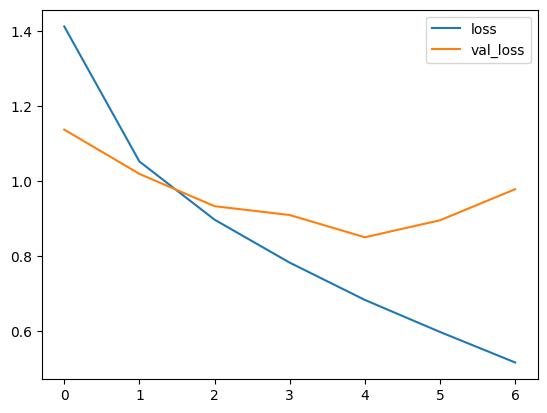

In [25]:
metrics[['loss','val_loss']].plot()
# we stopped training the model as the validation loss started to increase means the model started to overfit

<Axes: >

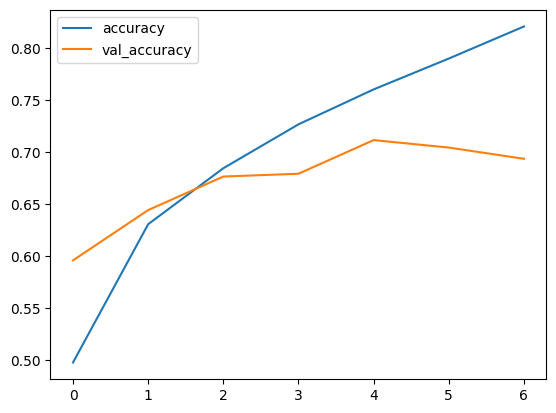

In [26]:
metrics[['accuracy','val_accuracy']].plot()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
predictions = model.predict(X_test)
preds = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [30]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70      1000
           1       0.83      0.77      0.80      1000
           2       0.51      0.68      0.58      1000
           3       0.58      0.45      0.51      1000
           4       0.60      0.68      0.64      1000
           5       0.67      0.54      0.60      1000
           6       0.67      0.88      0.76      1000
           7       0.75      0.77      0.76      1000
           8       0.80      0.81      0.80      1000
           9       0.81      0.74      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [31]:
confusion_matrix(y_test,preds)

array([[613,  18, 150,  13,  52,  11,  18,  21,  85,  19],
       [ 17, 772,  29,   8,   5,   2,  19,   5,  42, 101],
       [ 21,   2, 675,  31, 102,  34,  88,  33,   7,   7],
       [ 11,  15, 102, 448, 103, 128, 126,  41,  14,  12],
       [  7,   3,  97,  33, 684,  18,  80,  66,  10,   2],
       [  6,   4, 106, 160,  67, 537,  55,  54,   5,   6],
       [  3,   3,  40,  30,  23,  12, 881,   2,   4,   2],
       [  7,   3,  51,  25,  71,  47,  18, 773,   1,   4],
       [ 32,  26,  42,   9,  26,  10,  21,   2, 812,  20],
       [ 39,  87,  30,  12,  11,   6,   6,  30,  39, 740]])

Prediction

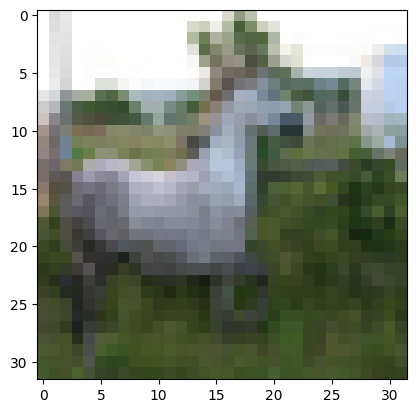

In [33]:
image = X_test[69]
plt.imshow(image)

In [35]:
y_test[69]

array([7], dtype=uint8)

In [37]:
np.argmax(model.predict(image.reshape(1,32,32,3)))

1/1 [==============================] - 0s 91ms/step


7